# 一、高频分析

定义加载小说的函数

In [9]:
def load_novel(novel):
    with open(f'./file/novels/{novel}.txt', 'rt', encoding='utf-8') as f:
        return f.read()

# 二、主角分析

加载人物数据

In [10]:
with open('./file/data/names.txt', 'rt', encoding='utf-8') as f:
    data = [line.rstrip() for line in f]
    novels = data[::2]
    names = data[1::2]
    novel_names = {k: v.split() for k,v in zip(novels, names)}
    del novels, names, data

可以预览一下《天龙八部》中的人物

In [11]:
",".join(novel_names['天龙八部'][:20])

'刀白凤,丁春秋,马夫人,马五德,小翠,于光豪,巴天石,不平道人,邓百川,风波恶,甘宝宝,公冶乾,木婉清,包不同,天狼子,太皇太后,王语嫣,乌老大,无崖子,云岛主'

下面我们寻找一下每部小说的主角，统计每个人物的出场次数，显然次数越多主角光环越强，下面我们看看每部小说，出现次数最多的前十个人物：

In [13]:
from collections import Counter
def find_main_characters(novel, num=10, content=None):
    if content is None:
        content = load_novel(novel)
    count = Counter()
    for name in novel_names[novel]:
        count[name] = content.count(name)
    return count.most_common(num)

for novel in novel_names:
    print(novel, find_main_characters(novel, num=5, content=None))
    

书剑恩仇录 [('陈家洛', 2095), ('张召重', 760), ('徐天宏', 685), ('霍青桐', 650), ('余鱼同', 605)]
碧血剑 [('袁承志', 3028), ('何铁手', 306), ('温青', 254), ('阿九', 215), ('洪胜海', 200)]
射雕英雄传 [('郭靖', 5009), ('黄蓉', 3650), ('洪七公', 1041), ('黄药师', 868), ('周伯通', 654)]
神雕侠侣 [('杨过', 5991), ('小龙女', 2133), ('郭靖', 1431), ('黄蓉', 1428), ('李莫愁', 1016)]
雪山飞狐 [('胡斐', 230), ('曹云奇', 228), ('宝树', 225), ('苗若兰', 217), ('胡一刀', 207)]
飞狐外传 [('胡斐', 2761), ('程灵素', 765), ('袁紫衣', 425), ('苗人凤', 405), ('马春花', 331)]
白马啸西风 [('李文秀', 441), ('苏普', 270), ('阿曼', 164), ('苏鲁克', 147), ('陈达海', 106)]
倚天屠龙记 [('张无忌', 4665), ('赵敏', 1250), ('谢逊', 1211), ('张翠山', 1146), ('周芷若', 825)]
鸳鸯刀 [('萧中慧', 103), ('袁冠南', 82), ('卓天雄', 76), ('周威信', 74), ('林玉龙', 52)]
天龙八部 [('段誉', 3372), ('萧峰', 1786), ('虚竹', 1636), ('阿紫', 1150), ('乔峰', 1131)]
连城诀 [('狄云', 1433), ('水笙', 439), ('戚芳', 390), ('丁典', 364), ('万震山', 332)]
侠客行 [('石破天', 1804), ('石清', 611), ('丁珰', 446), ('白万剑', 446), ('丁不四', 343)]
笑傲江湖 [('令狐冲', 5838), ('岳不群', 1184), ('林平之', 926), ('岳灵珊', 919), ('仪琳', 729)]
鹿鼎记 [('韦小宝', 9731)

上述结果用文本展示了每部小说的前5个主角，但是不够直观，下面用pyecharts的树图展示一下：

In [14]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap

data = []
for novel in novel_names:
    tmp = []
    data.append({"name": novel, "children": tmp})
    for name, count in find_main_characters(novel, 5):
        tmp.append({"name": name, "value": count})
c = (
    TreeMap()
    .add("", data, levels=[
        opts.TreeMapLevelsOpts(),
        opts.TreeMapLevelsOpts(
            color_saturation=[0.4, 0.6],
            treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                border_color_saturation=0.7, gap_width=5, border_width=10
            ),
            upper_label_opts=opts.LabelOpts(
                is_show=True, position='insideTopLeft', vertical_align='top'
            )
        ),
    ])
    .set_global_opts(title_opts=opts.TitleOpts(title="金庸小说主角"))
)
c.render_notebook()

# 三、武功分析

In [15]:
with open('./file/data/kungfu.txt', 'rt', encoding='utf-8') as f:
    data = [line.rstrip() for line in f]
    novels = data[::2]
    kungfu = data[1::2]
    novel_kungfu = {k: v.split() for k,v in zip(novels, kungfu) if k!= '未知'}
    del novels, kungfu, data
    
def find_main_kungfus(novel, num=10, content=None):
    if content is None:
        content = load_novel(novel)
    count = Counter()
    for kungfu in novel_kungfu[novel]:
        count[kungfu] = content.count(kungfu)
    return count.most_common(num)

data = []
for novel in novel_kungfu:
    tmp = []
    data.append({"name": novel, "children": tmp})
    for name, count in find_main_kungfus(novel, 5):
        tmp.append({"name": name, "value": count})
c = (
    TreeMap()
    .add("", data, levels=[
        opts.TreeMapLevelsOpts(),
        opts.TreeMapLevelsOpts(
            color_saturation=[0.4, 0.6],
            treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                border_color_saturation=0.7, gap_width=5, border_width=10
            ),
            upper_label_opts=opts.LabelOpts(
                is_show=True, position='insideTopLeft', vertical_align='top'
            )
        ),
    ])
    .set_global_opts(title_opts=opts.TitleOpts(title="金庸小说主角"))
)
c.render_notebook()

# 四、门派分析

In [18]:
with open('./file/data/bangs.txt', encoding="utf-8") as f:
    data = [line.rstrip() for line in f]
novels = data[::2]
bangs = data[1::2]
novel_bangs = {k: v.split() for k, v in zip(novels, bangs) if k != "未知"}
del novels, bangs, data


def find_main_bangs(novel, num=10, content=None):
    if content is None:
        content = load_novel(novel)
    count = Counter()
    for name in novel_bangs[novel]:
        count[name] = content.count(name)
    return count.most_common(num)

data = []
for novel in novel_bangs:
    tmp = []
    data.append({"name": novel, "children": tmp})
    for name, count in find_main_bangs(novel, 5):
        tmp.append({"name": name, "value": count})
c = (
    TreeMap()
    .add("", data, levels=[
        opts.TreeMapLevelsOpts(),
        opts.TreeMapLevelsOpts(
            color_saturation=[0.3, 0.6],
            treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                border_color_saturation=0.7, gap_width=5, border_width=10
            ),
            upper_label_opts=opts.LabelOpts(
                is_show=True, position='insideTopLeft', vertical_align='top'
            )
        ),
    ])
    .set_global_opts(title_opts=opts.TitleOpts(title="金庸高频门派"))
)
c.render_notebook()

下面编写一个函数，输入一部小说名，可以输出其最高频的主角、武功和门派：

In [78]:
from pyecharts import options as opts
from pyecharts.charts import Bar

def show_top10(novel):
    content = load_novel(novel)
    charecters = find_main_characters(novel, 10, content)[::-1]
    k, v = map(list, zip(*charecters))
    c = (
        Bar(init_opts=opts.InitOpts("720px", "320px"))
        .add_xaxis(k)
        .add_yaxis("", v)
        .reversal_axis()
        .set_series_opts(label_opts=opts.LabelOpts(position="right"))
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{novel}主角"))
    )
    display(c.render_notebook())
    kungfus = find_main_kungfus(novel, 10, content)[::-1]
    k, v = map(list, zip(*kungfus))
    c = (
        Bar(init_opts=opts.InitOpts("720px", "320px"))
        .add_xaxis(k)
        .add_yaxis("", v)
        .reversal_axis()
        .set_series_opts(label_opts=opts.LabelOpts(position="right"))
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{novel}功夫"))
    )
    display(c.render_notebook())
    bangs = find_main_bangs(novel, 10, content)[::-1]
    k, v = map(list, zip(*bangs))
    c = (
        Bar(init_opts=opts.InitOpts("720px", "320px"))
        .add_xaxis(k)
        .add_yaxis("", v)
        .reversal_axis()
        .set_series_opts(label_opts=opts.LabelOpts(position="right"))
        .set_global_opts(title_opts=opts.TitleOpts(title=f"{novel}门派"))
    )
    display(c.render_notebook())

In [ ]:
show_top10("天龙八部")

# 五、词云图分析

可以先添加所有的人物、武功和门派作为自定义词汇：

In [19]:
import jieba

for novel, names in novel_names.items():
    for name in names:
        jieba.add_word(name)
        
for novel, kungfus in novel_kungfu.items():
    for kungfu in kungfus:
        jieba.add_word(kungfu)

for novel, bangs in novel_bangs.items():
    for bang in bangs:
        jieba.add_word(bang)

## 文章整体词云查看

这里我们仅提取词长度不小于4的成语、俗语和短语进行分析，以天龙八部这部小说为例：

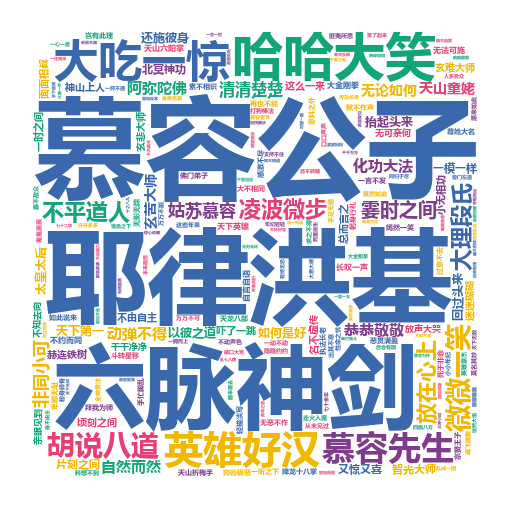

In [24]:
from IPython.display import Image
import stylecloud
import jieba
import re

text = re.sub("[^一-龟]+", " ", load_novel("天龙八部"))
words = [word for word in jieba.cut(text) if len(word) >=4]
stylecloud.gen_stylecloud(" ".join(words),
                          collocations=False,
                          font_path=r'C:\Windows\Fonts\msyhbd.ttc',
                          icon_name='fas fa-square',
                          output_name='tmp.png')
Image(filename='tmp.png')

## 主角相关剧情词云

我们知道《神雕侠侣》这部小说最重要的主角是杨过和小龙女，我们可能会对于杨过和小龙女之间所发生的故事很感兴趣。如果通过程序快速了解呢？

我们考虑把《神雕侠侣》这部小说每一段中出现杨过及小龙女的段落进行jieba分词并制作词云。

同样我们只看4个字以上的词：

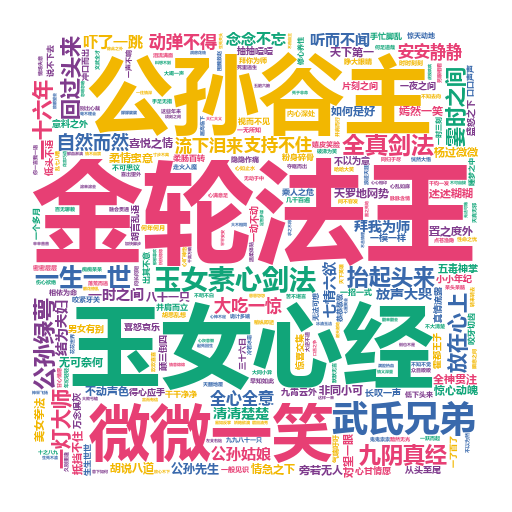

In [25]:
data = []
for line in load_novel("神雕侠侣").splitlines():
    if "杨过" in line and "小龙女" in line:
        line = re.sub("[^一-龟]+", " ", line)
        data.extend(word for word in jieba.cut(line) if len(word) >= 4)
stylecloud.gen_stylecloud(" ".join(data),
                          collocations=False,
                          font_path=r'C:\Windows\Fonts\msyhbd.ttc',
                          icon_name='fas fa-square',
                          output_name='tmp.png')
Image(filename='tmp.png')

# 六、人物关系分析

金庸小说15部小说中预计出现了1400个以上的角色，下面我们将遍历小说的每一段，在一段中出现的任意两个角色，都计数1。最终我们取出现频次最高的前200个关系对进行可视化。

In [26]:
from pyecharts import options as opts
from pyecharts.charts import Graph
import math
import itertools

count = Counter()
for novel in novel_names:
    names = novel_names[novel]
    re_rule = f"({'|'.join(names)})"
    for line in load_novel(novel).splitlines():
        names = list(set(re.findall(re_rule, line)))
        if names and len(names) >= 2:
            names.sort()
            for s, t in itertools.combinations(names, 2):
                count[(s, t)] += 1
count = count.most_common(200)
node_count, nodes, links = Counter(), [], []
for (n1, n2), v in count:
    node_count[n1] += 1
    node_count[n2] += 1
    links.append({"source": n1, "target": n2})
for node, count in node_count.items():
    nodes.append({"name": node, "symbolSize": int(math.log(count)*5)+5})
c = (
    Graph(init_opts=opts.InitOpts("1280px","960px"))
    .add("", nodes, links, repulsion=30)
)
c.render("tmp.html")

'C:\\Users\\caoyuanyuan\\CYY_Git\\Python_Learning\\7_数据分析\\1_数据分析\\案例练习\\2-探索金庸小说世界\\tmp.html'